# [Lenses Data Set](http://archive.ics.uci.edu/ml/datasets/Lenses) #

## Data Set Information:##

The examples are complete and noise free. The examples highly simplified the problem. The attributes do not fully describe all the factors affecting the decision as to which type, if any, to fit. 

Notes: 
+ This database is complete (all possible combinations of attribute-value pairs are represented). 
+ Each instance is complete and correct. 
+ 9 rules cover the training set.


## Attribute Information: ##

3 Classes 
+ 1: the patient should be fitted with hard contact lenses
+ 2: the patient should be fitted with soft contact lenses 
+ 3: the patient should not be fitted with contact lenses 

4 Features
+ age of the patient: (1) young, (2) pre-presbyopic, (3) presbyopic 
+ spectacle prescription: (1) myope, (2) hypermetrope 
+ astigmatic: (1) no, (2) yes 
+ tear production rate: (1) reduced, (2) normal

In [23]:
# ML Pipeline Stage 1
# import python libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy as sp
print('scipy: {}'.format(sp.__version__))
# numpy
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

import seaborn
print('seaborn: {}'.format(seaborn.__version__))

# pyplot
import matplotlib.pyplot as plt
# pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

# Load libraries
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot
import pickle
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.externals import joblib

%matplotlib inline

Python: 3.5.2 |Anaconda 4.2.0 (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
scipy: 0.18.1
numpy: 1.11.1
matplotlib: 1.5.3
seaborn: 0.7.1
pandas: 0.18.1
sklearn: 0.17.1


In [2]:
# ml pipeline stage 2
# load data

import pandas as pd
url="http://archive.ics.uci.edu/ml/machine-learning-databases/lenses/lenses.data"
names=["row","age","prescription","astigmatic","tear_prod_rate","class"]
data=pd.read_csv(url,delim_whitespace=True,names=names)

In [3]:
# ml pipeline stage 3
# understand data with descriptive statistics
# (1) Understand your data using the head() function 
#     to look at the first few rows.
# (2) Review the dimensions of your data with the 
#     shape property.
# (3) Look at the data types for each attribute with 
#     the dtypes property.
# (4) Review the distribution of your data with the 
#     describe() function.
# (5) Calculate pairwise correlation between your 
#     variables using the corr() function.
data.head()

,row,age,prescription,astigmatic,tear_prod_rate,class
0,1,1,1,1,1,3
1,2,1,1,1,2,2
2,3,1,1,2,1,3
3,4,1,1,2,2,1
4,5,1,2,1,1,3


In [4]:
# drop row column
# axis 0 for rows and 1 for columns
# inplace=True avoids reassigning of dataframe
data.drop('row',axis=1,inplace=True)
data.head()

,age,prescription,astigmatic,tear_prod_rate,class
0,1,1,1,1,3
1,1,1,1,2,2
2,1,1,2,1,3
3,1,1,2,2,1
4,1,2,1,1,3


In [5]:
data.shape

(24, 5)

In [6]:
data.dtypes

age               int64
prescription      int64
astigmatic        int64
tear_prod_rate    int64
class             int64
dtype: object

In [36]:
data.describe()

,age,prescription,astigmatic,tear_prod_rate,class
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2.000000,1.500000,1.500000,1.500000,2.458333
std,0.834058,0.510754,0.510754,0.510754,0.779028
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,2.000000
50%,2.000000,1.500000,1.500000,1.500000,3.000000
75%,3.000000,2.000000,2.000000,2.000000,3.000000
max,3.000000,2.000000,2.000000,2.000000,3.000000


In [37]:
def plot_corr(data, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = data.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

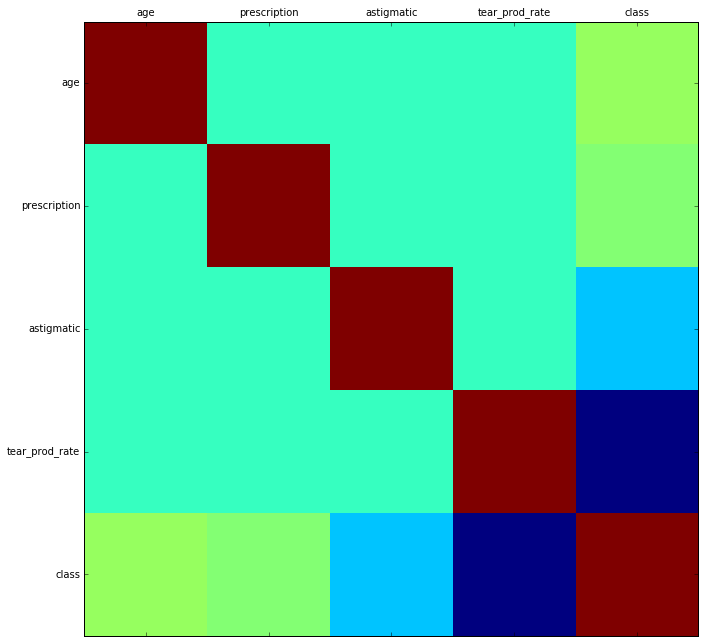

In [38]:
plot_corr(data)

# none of the features seem to be correlated
# hence we keep all features

In [39]:
data.corr()

,age,prescription,astigmatic,tear_prod_rate,class
age,1.000000,0.000000,0.000000,0.000000,0.200745
prescription,0.000000,1.000000,0.000000,0.000000,0.163908
astigmatic,0.000000,0.000000,1.000000,0.000000,-0.163908
tear_prod_rate,0.000000,0.000000,0.000000,1.000000,-0.710266
class,0.200745,0.163908,-0.163908,-0.710266,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d4a8c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11da2b6d8>]], dtype=object)

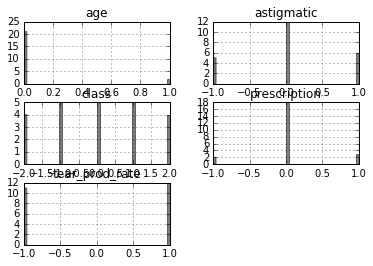

In [43]:
# ml pipeline stage 4
# visualize data in order to understand attributes 
# alone and their interactions.

# (1) Use the hist() function to create a histogram 
#     of each attribute.
# (2) Use the plot(kind=’box’) function to create 
#     box-and-whisker plots of each attribute.
# (3) Use the pandas.scatter_matrix() function to 
#     create pairwise scatterplots of all attributes.

data.diff().hist(color='k',alpha=0.5, bins=50)



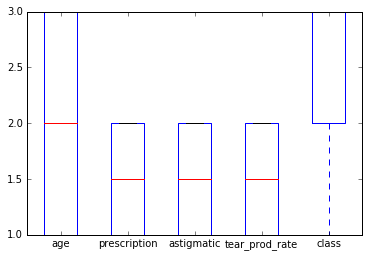

In [46]:
data.plot(kind='box')

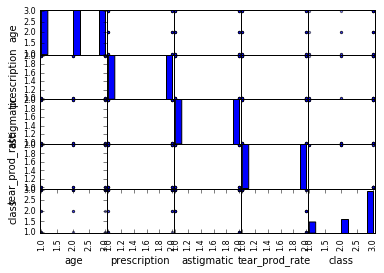

In [49]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data)
plt.show()

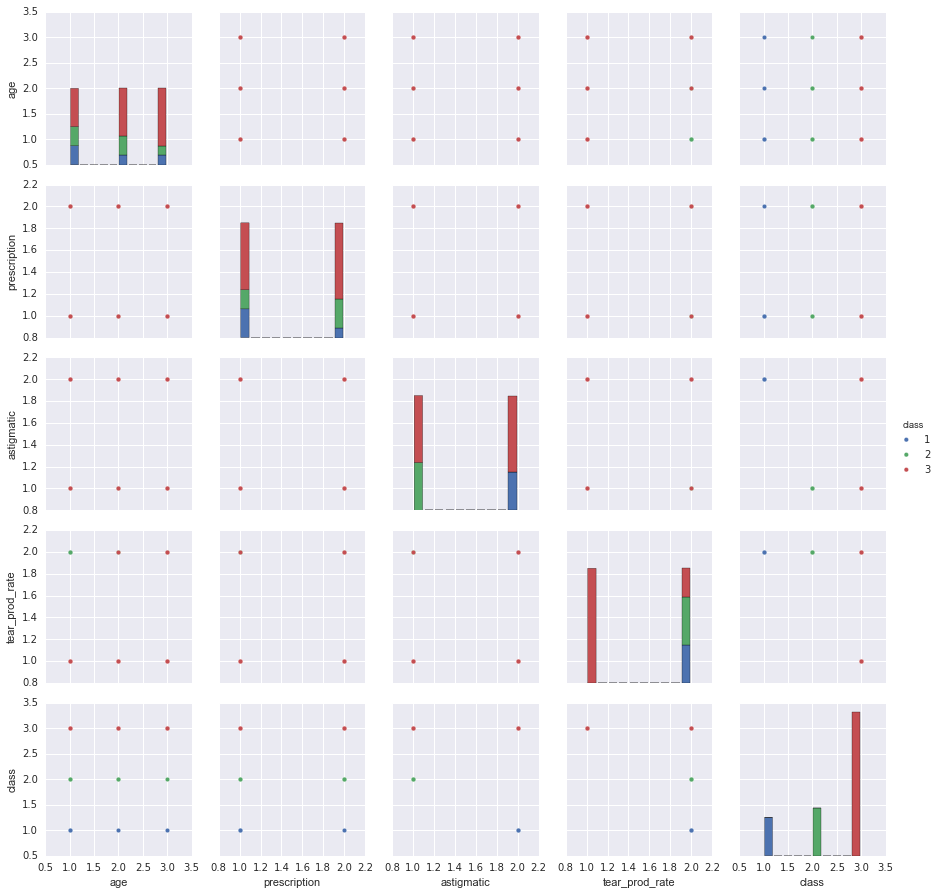

In [50]:
import seaborn as sns
%matplotlib inline
sns.pairplot(data,hue="class")

In [15]:
cat_data=data
cat_data['class'].replace([1,2,3],['hard','soft','no'],inplace=True)

In [16]:
cat_data

,age,prescription,astigmatic,tear_prod_rate,class
0,1,1,1,1,no
1,1,1,1,2,soft
2,1,1,2,1,no
3,1,1,2,2,hard
4,1,2,1,1,no
5,1,2,1,2,soft
6,1,2,2,1,no
7,1,2,2,2,hard
8,2,1,1,1,no
9,2,1,1,2,soft


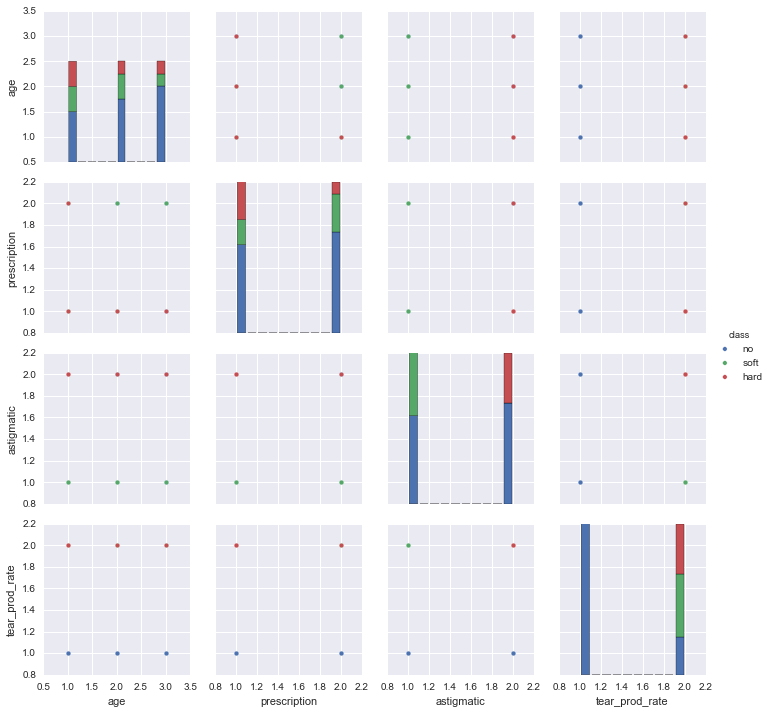

In [17]:
sns.pairplot(cat_data,hue="class")

In [18]:
X=data[['age','prescription','astigmatic','tear_prod_rate']]
y=data['class']

test_size=0.30
seed=7

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=test_size, random_state=seed)

In [19]:
num_folds=10
num_instances=len(X_train)

scoring='accuracy'

In [20]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.750000 (0.403113)
LDA: 0.750000 (0.403113)
KNN: 0.750000 (0.403113)
CART: 0.650000 (0.390512)
NB: 0.700000 (0.400000)
SVM: 0.750000 (0.403113)


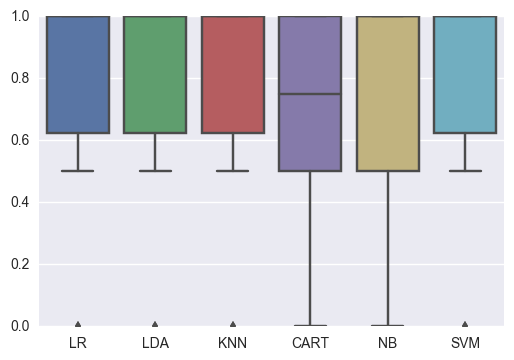

In [24]:
ax = seaborn.boxplot(data=results)
ax.set_xticklabels(names) # seaborn returns matplotlib ax

In [25]:
svm = SVC()
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.25
[[0 0 1]
 [0 0 5]
 [0 0 2]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         1
          2       0.00      0.00      0.00         5
          3       0.25      1.00      0.40         2

avg / total       0.06      0.25      0.10         8



C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
nb = DecisionTreeClassifier()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.375
[[1 0 0]
 [2 0 3]
 [0 0 2]]
             precision    recall  f1-score   support

          1       0.33      1.00      0.50         1
          2       0.00      0.00      0.00         5
          3       0.40      1.00      0.57         2

avg / total       0.14      0.38      0.21         8



C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
